In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyPI as pi

In [2]:
def plot_alpha_variation(Eis, delta_chi):
    """
    Plots the variation of |Esx|, |Esy|, and Delta_phi_s as a function of alpha.
    
    Parameters:
    Eis : ndarray
        Incident electric field vector.
    delta_chi : float
        Phase shift introduced by the birefringent material.
    """
    alpha_values = np.linspace(0, 2 * np.pi, 100)
    Esx_values = []
    Esy_values = []
    delta_phi_s_values = []
    
    key_alphas = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
    key_values = []
    
    for alpha in alpha_values:

        S = pi.jones_matrix(delta_chi, alpha)
        
        Es = S @ Eis
        delta_phi_s = np.abs(np.angle(Es[1,0]) - np.angle(Es[0,0]))
        
        Esx_values.append(np.abs(Es[0])[0])
        Esy_values.append(np.abs(Es[1])[0])
        delta_phi_s_values.append(delta_phi_s)
        
        if alpha in key_alphas:
            key_values.append((alpha, np.abs(Es[0])[0], np.abs(Es[1])[0], delta_phi_s))
    
    # Líneas de referencia
    def plot_reference_lines():
        for alpha in key_alphas:
            plt.axvline(x=alpha, color='gray', linestyle='--', alpha=0.6)
    
    # Gráfica de Esx
    plt.figure()
    plt.plot(alpha_values, Esx_values, label='|Esx|', color='b')
    plot_reference_lines()
    Esx_0 = key_values[0][1]  # Valor de Esx cuando alpha = 0
    plt.axhline(y=Esx_0, color='b', linestyle='dotted')
    for alpha, Esx, _, _ in key_values:
        plt.scatter(alpha, Esx, color='b')
    plt.xlabel('Alpha (n π)')
    plt.xticks(key_alphas, ['0', 'π/2', 'π', '3π/2', '2π'])
    plt.ylabel('|Esx|')
    plt.title('Variación de Esx con Alpha')
    plt.grid()
    plt.legend()
    plt.show()
    
    # Gráfica de Esy
    plt.figure()
    plt.plot(alpha_values, Esy_values, label='|Esy|', color='r')
    plot_reference_lines()
    Esy_0 = key_values[0][2]  # Valor de Esy cuando alpha = 0
    plt.axhline(y=Esy_0, color='r', linestyle='dotted')
    for alpha, _, Esy, _ in key_values:
        plt.scatter(alpha, Esy, color='r')
    plt.xlabel('Alpha (n π)')
    plt.xticks(key_alphas, ['0', 'π/2', 'π', '3π/2', '2π'])
    plt.ylabel('|Esy|')
    plt.title('Variación de Esy con Alpha')
    plt.grid()
    plt.legend()
    plt.show()
    
    # Gráfica de delta_phi_s
    plt.figure()
    plt.plot(alpha_values, delta_phi_s_values, label='Delta_phi_s', color='g')
    plot_reference_lines()
    delta_phi_0 = key_values[0][3]  # Valor de Delta_phi_s cuando alpha = 0
    plt.axhline(y=delta_phi_0, color='g', linestyle='dotted')
    for alpha, _, _, delta_phi_s in key_values:
        plt.scatter(alpha, delta_phi_s, color='g')
    plt.xlabel('Alpha (n π)')
    plt.xticks(key_alphas, ['0', 'π/2', 'π', '3π/2', '2π'])
    plt.ylabel('Delta_phi_s (rad)')
    plt.title('Variación de Delta_phi_s con Alpha')
    plt.grid()
    plt.legend()
    plt.show()
    
    # Crear tabla con valores clave
    #df = pd.DataFrame(key_values, columns=['Alpha (rad)', '|Esx|', '|Esy|', 'Delta_phi_s'])
    #print(df)

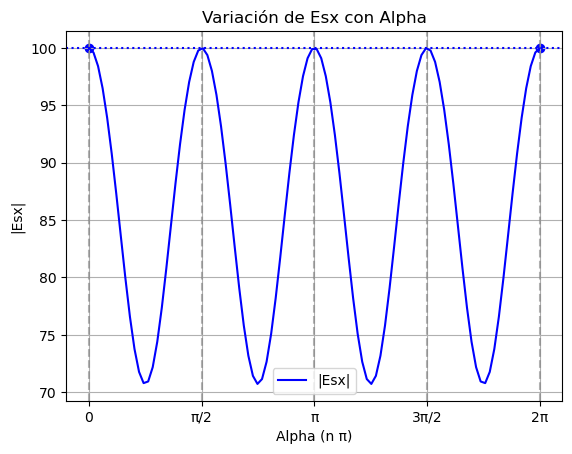

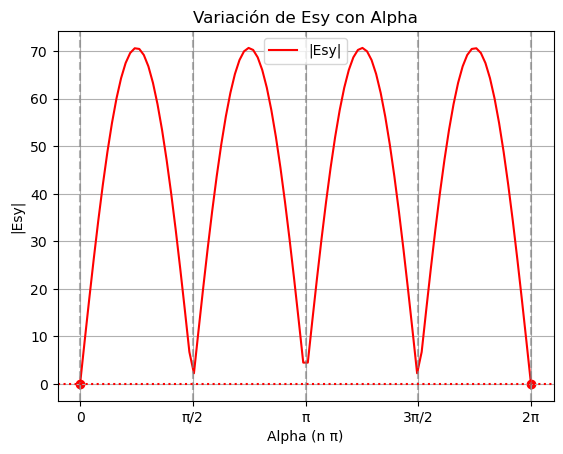

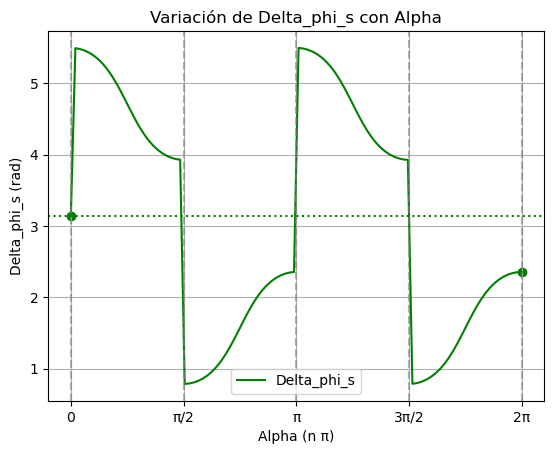

In [3]:
import numpy as np
import pyPI as pi
Eis = 100 * np.array([[-1], [0]])
#Eis = np.array([[1], [1]])

delta_chi = np.pi/2

plot_alpha_variation(Eis, delta_chi)